### Overview

1) Introduction
    - Install and load packages
    - Load csv data into R data frame
2) EDA
    - Overview of data
    - Data cleaning (dropping features)
    - Data visualization
3) Linear Regression Model Analysis
4) Conclusion

# Introduction
This is a comprhensive analysis of the [NYPD Shooting Incident Data (Historic) - Catalog](https://catalog.data.gov/dataset/nypd-shooting-incident-data-historic). This dataset records every shooting incident that occured in 2006 - 2022. Each record includes information related to the shooting such as suspect and victim demographics, location, and date. 

We will study and visulaize the data using ggplot2 and tidyverse. Later, we will generate some questions based on our findings about the data. Finally, we will model our processed data and make an analysis about the questions we have formed. 

**The purpose of this report is to examine the following questions:**
1) Is the number of shooting incidents going up or down?
2) What is distribution of the Victim's demographic information 

## Install and Load Libraries 

In [ ]:
#install packages

In [1]:
#common packages

#data wrangling packages
library(tidyverse)

#data visualization packages
library(forcats)

#utility packages
library(assert)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.0
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Load Data 

In [2]:
#check data size, columns and data types
file_path = 'NYPD_Shooting_Incident_Data__Historic_.csv'
original_df = read_csv(file_path)
spec(original_df)

Rows: 25596 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (10): OCCUR_DATE, BORO, LOCATION_DESC, PERP_AGE_GROUP, PERP_SEX, PERP_R...
dbl   (7): INCIDENT_KEY, PRECINCT, JURISDICTION_CODE, X_COORD_CD, Y_COORD_CD...
lgl   (1): STATISTICAL_MURDER_FLAG
time  (1): OCCUR_TIME

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


cols(
  INCIDENT_KEY = col_double(),
  OCCUR_DATE = col_character(),
  OCCUR_TIME = col_time(format = ""),
  BORO = col_character(),
  PRECINCT = col_double(),
  JURISDICTION_CODE = col_double(),
  LOCATION_DESC = col_character(),
  STATISTICAL_MURDER_FLAG = col_logical(),
  PERP_AGE_GROUP = col_character(),
  PERP_SEX = col_character(),
  PERP_RACE = col_character(),
  VIC_AGE_GROUP = col_character(),
  VIC_SEX = col_character(),
  VIC_RACE = col_character(),
  X_COORD_CD = col_double(),
  Y_COORD_CD = col_double(),
  Latitude = col_double(),
  Longitude = col_double(),
  Lon_Lat = col_character()
)

# EDA

## Quick Overview of the Entire Data

In [3]:
summary(original_df)

  INCIDENT_KEY        OCCUR_DATE         OCCUR_TIME           BORO          
 Min.   :  9953245   Length:25596       Length:25596      Length:25596      
 1st Qu.: 61593633   Class :character   Class1:hms        Class :character  
 Median : 86437258   Mode  :character   Class2:difftime   Mode  :character  
 Mean   :112382648                      Mode  :numeric                      
 3rd Qu.:166660833                                                          
 Max.   :238490103                                                          
                                                                            
    PRECINCT      JURISDICTION_CODE LOCATION_DESC      STATISTICAL_MURDER_FLAG
 Min.   :  1.00   Min.   :0.0000    Length:25596       Mode :logical          
 1st Qu.: 44.00   1st Qu.:0.0000    Class :character   FALSE:20668            
 Median : 69.00   Median :0.0000    Mode  :character   TRUE :4928             
 Mean   : 65.87   Mean   :0.3316                                    

In [4]:
glimpse(original_df)

Rows: 25,596
Columns: 19
$ INCIDENT_KEY            <dbl> 236168668, 231008085, 230717903, 237712309, 22…
$ OCCUR_DATE              <chr> "11/11/2021", "07/16/2021", "07/11/2021", "12/…
$ OCCUR_TIME              <time> 15:04:00, 22:05:00, 01:09:00, 13:42:00, 20:00…
$ BORO                    <chr> "BROOKLYN", "BROOKLYN", "BROOKLYN", "BROOKLYN"…
$ PRECINCT                <dbl> 79, 72, 79, 81, 113, 113, 42, 52, 34, 75, 32, …
$ JURISDICTION_CODE       <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0…
$ LOCATION_DESC           <chr> NA, NA, NA, NA, NA, NA, "COMMERCIAL BLDG", NA,…
$ STATISTICAL_MURDER_FLAG <lgl> FALSE, FALSE, FALSE, FALSE, FALSE, TRUE, TRUE,…
$ PERP_AGE_GROUP          <chr> NA, "45-64", "<18", NA, NA, NA, NA, NA, NA, "2…
$ PERP_SEX                <chr> NA, "M", "M", NA, NA, NA, NA, NA, NA, "M", "M"…
$ PERP_RACE               <chr> NA, "ASIAN / PACIFIC ISLANDER", "BLACK", NA, N…
$ VIC_AGE_GROUP           <chr> "18-24", "25-44", "25-44", "25-44", "25-44", "…
$ VIC_SEX      

## Cleaning and Extracting Data

Before we start exploring our data, we can drop some columns of the data where information overlaps.

We can drop:
- *X_COORD_CD* & *Y_COORD_CD* because *Latitude* & *Longitude* exists
- *Latitude* and *Longitude* because *Lon_Lat* is a column that combines both
- *ind* & *INCIDENT_KEY*
- *BORO* because *PRECINCT* contains boro information

In [5]:
df = original_df %>%
    select(-c(X_COORD_CD, Y_COORD_CD, Latitude, Longitude, INCIDENT_KEY, OCCUR_TIME, PRECINCT, JURISDICTION_CODE, STATISTICAL_MURDER_FLAG, Lon_Lat))

In [6]:
glimpse(df)    

Rows: 25,596
Columns: 9
$ OCCUR_DATE     <chr> "11/11/2021", "07/16/2021", "07/11/2021", "12/11/2021",…
$ BORO           <chr> "BROOKLYN", "BROOKLYN", "BROOKLYN", "BROOKLYN", "QUEENS…
$ LOCATION_DESC  <chr> NA, NA, NA, NA, NA, NA, "COMMERCIAL BLDG", NA, NA, NA, …
$ PERP_AGE_GROUP <chr> NA, "45-64", "<18", NA, NA, NA, NA, NA, NA, "25-44", "2…
$ PERP_SEX       <chr> NA, "M", "M", NA, NA, NA, NA, NA, NA, "M", "M", NA, "M"…
$ PERP_RACE      <chr> NA, "ASIAN / PACIFIC ISLANDER", "BLACK", NA, NA, NA, NA…
$ VIC_AGE_GROUP  <chr> "18-24", "25-44", "25-44", "25-44", "25-44", "25-44", "…
$ VIC_SEX        <chr> "M", "M", "M", "M", "M", "M", "M", "M", "M", "M", "M", …
$ VIC_RACE       <chr> "BLACK", "ASIAN / PACIFIC ISLANDER", "BLACK", "BLACK", …


## Individual Feature Visualization 

### Distribution of Borough Where Incident Took Place 
This is the frequency distribution of where the shooting incident took place:

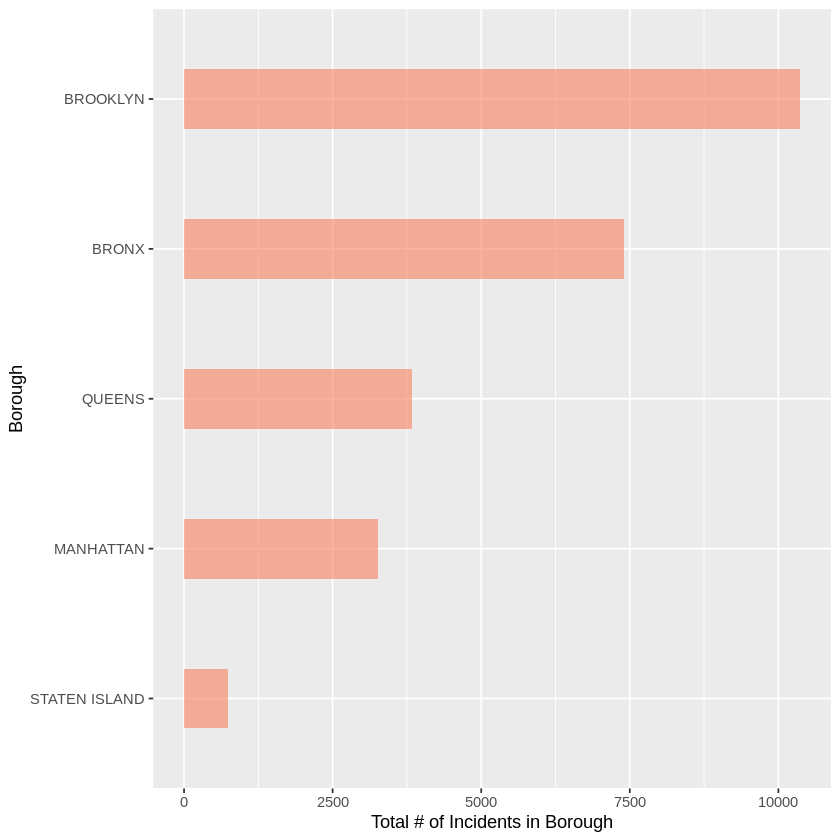

In [7]:
boro_distribution = df %>%
  group_by(BORO) %>%
  summarise(ct = n()) 


boro_distribution %>%
  mutate(BORO = fct_reorder(BORO, ct)) %>%
  ggplot( aes(x=BORO, y=ct)) +
    geom_bar(stat="identity", fill="#f68060", alpha=.6, width=.4) +
    coord_flip() +
    xlab("Borough") +
    ylab("Total # of Incidents in Borough") 

Based on our inital visualization, we can that Brooklyn has highest shooting rate with over 10000 cases. Furthermore, if we take a look at the population of each borough, we notice that as the population increases, the number of shooting incident increases.
### Conisdering Population
Population in Millions as of April 1st, 2020

- **Brooklyn**: 2.64 million
- **Bronx**: 1.47 million
- **Queens**: 2.41 million
- **Manhattan**: 1.69 million
- **Staten Island**: 0.49 million

However, Queens does not fit the trend. Despite the population similar to Brooklyn, the number of shooting incidents is less than half. Deep dive into Queens demographics may help us undercover methods to decrease shooting rates in other Boroughs.

### Distribution of Victim Demographics: Race

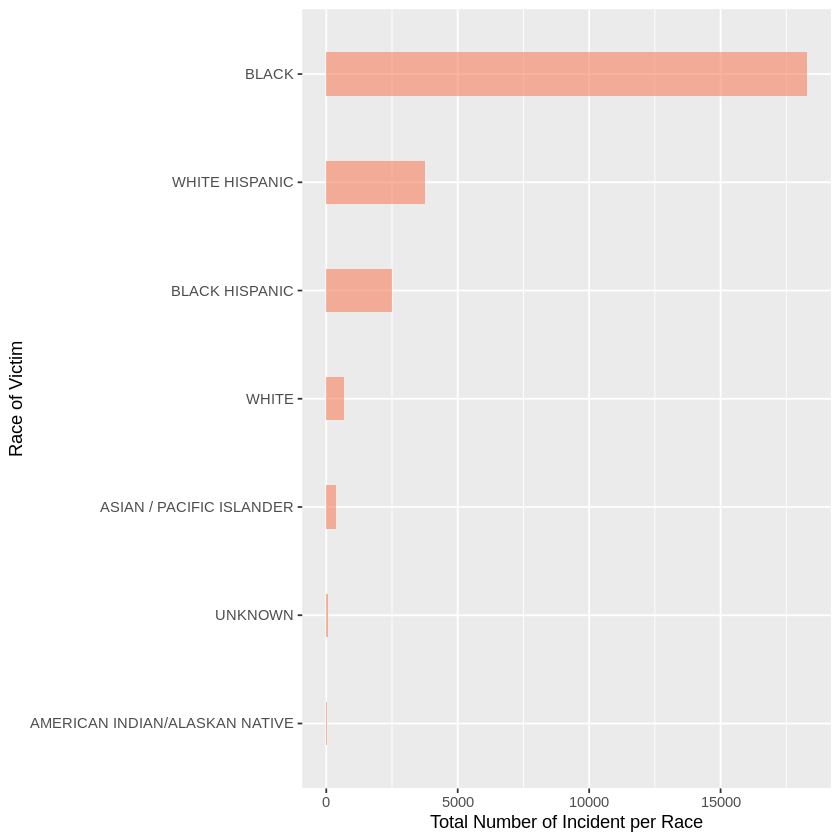

In [8]:
victim_race_distribution = df %>%
  group_by(VIC_RACE) %>%
  summarise(ct = n()) %>%
  arrange(desc(ct))
    
victim_race_distribution %>%
  mutate(VIC_RACE = fct_reorder(VIC_RACE, ct)) %>%
  ggplot( aes(x=VIC_RACE, y=ct)) +
    geom_bar(stat="identity", fill="#f68060", alpha=.6, width=.4) +
    coord_flip() +
    xlab("Race of Victim") +
    ylab("Total Number of Incident per Race") 

Here, we find that a heavy majority of the victim's in the shooting incident were black. 

### Distribution of Perpatrator Demographics: Race

In [9]:
df %>%
  group_by(PERP_RACE) %>%
  summarise(ct = n()) %>%
  arrange(desc(ct))    

PERP_RACE,ct
<chr>,<int>
BLACK,10668
NA,9310
WHITE HISPANIC,2164
UNKNOWN,1836
BLACK HISPANIC,1203
WHITE,272
ASIAN / PACIFIC ISLANDER,141
AMERICAN INDIAN/ALASKAN NATIVE,2


### Handling Missing Data

There are two ways missing data is handled in the PERP_RACE col.

1) NA
2) UNKNOWN

There were no further information regarding the difference from the source [NYPD Shooting Incident Data (Historic) | NYC Open Data](https://data.cityofnewyork.us/Public-Safety/NYPD-Shooting-Incident-Data-Historic-/833y-fsy8).Therefore we will make the assumption that NA refers to shooting incidents where the perpatrator has not been found. Unkown refers to cases where they have found the perpatrator but was unable to correctly identify their race. However, for our purposes, we will treat NA as UNKNOWN.

In [10]:
df = df %>% dplyr::mutate(PERP_RACE = replace_na(PERP_RACE, "UNKNOWN"))

perpetrator_race_distribution = df %>%
  group_by(PERP_RACE) %>%
  summarise(ct = n()) %>%
  arrange(desc(ct))    

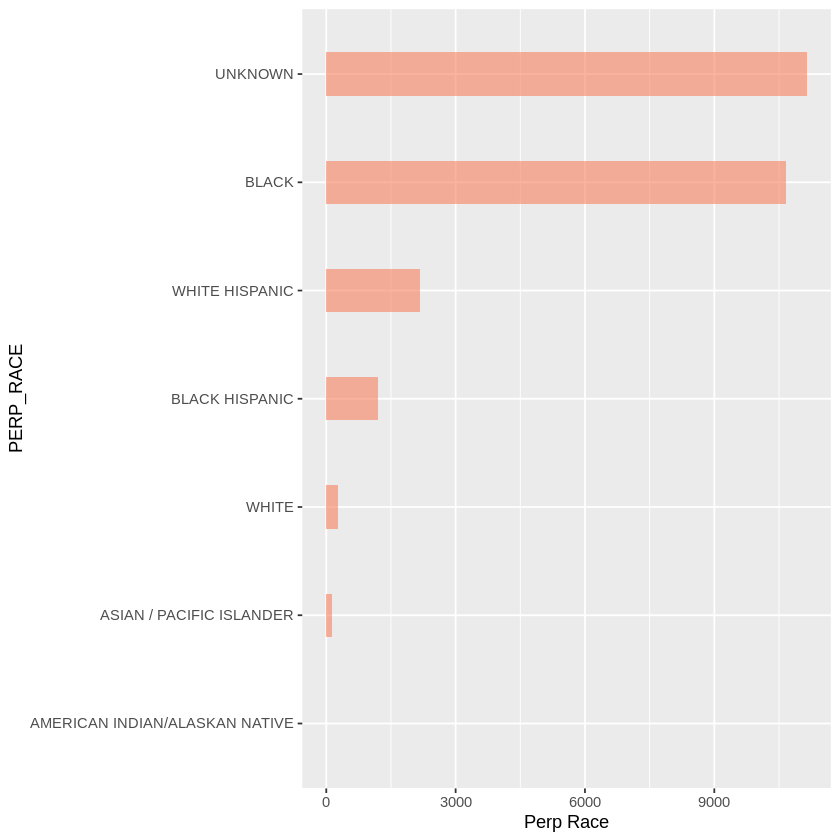

In [11]:
perpetrator_race_distribution %>%
  mutate(PERP_RACE = fct_reorder(PERP_RACE, ct)) %>%
  ggplot( aes(x=PERP_RACE, y=ct)) +
    geom_bar(stat="identity", fill="#f68060", alpha=.6, width=.4) +
    coord_flip() +
    xlab("PERP_RACE") +
    ylab("Perp Race") 

Here, we find that a heavy majority of the Perpatrator's in the shooting incident were black. However, there are many UNKOWN's which may impact the distribution if they are correctly indentified. 

# Linear Regression Model to Determine Trend in Number of Shooting Incident Per Year

## Feature Engineering 

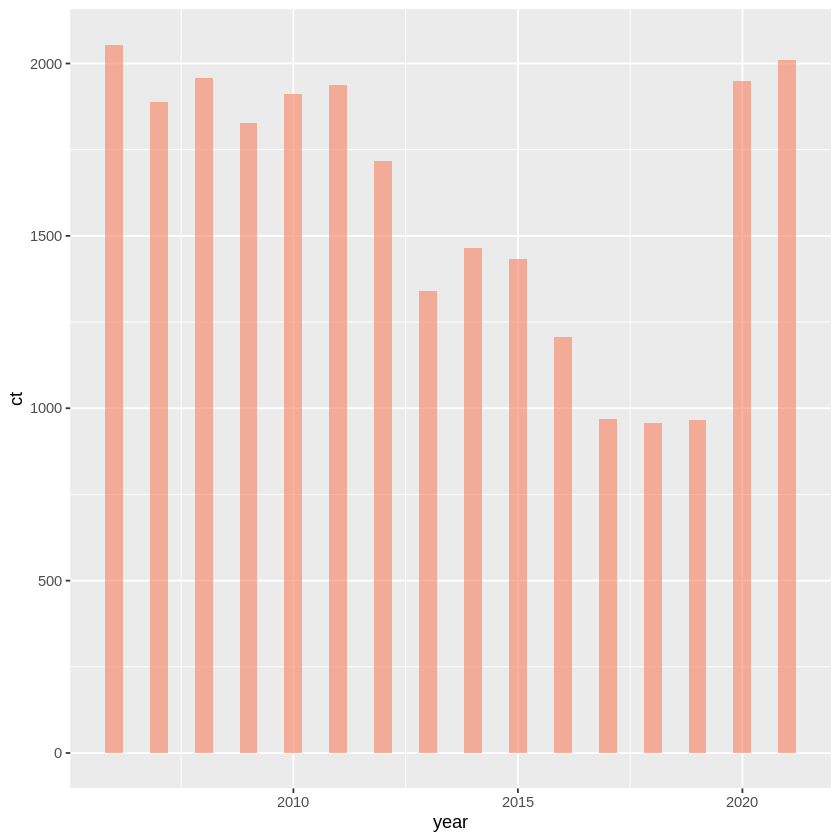

In [12]:
#split the occur_date string into 3 cols:
# year, day, and month

date_df = str_split_fixed(df$OCCUR_DATE, "/", 3)

df$year = as.integer(date_df[,3])
df$day =  as.integer(date_df[,2])
df$month =  as.integer(date_df[,1])
df$year_month = as.character(df$year + df$month/100)

incident_count_by_year = df %>%
  group_by(year) %>%
  summarise(ct = n()) %>%
  arrange()    

incident_count_by_year %>%
  ggplot( aes(x=year, y=ct)) +
    geom_bar(stat="identity", fill="#f68060", alpha=.6, width=.4) 

Based on the above visualization, from 2006 to 2019, there is a clear down trend. However, there is a big spike up in 2020. 

`geom_smooth()` using formula = 'y ~ x'


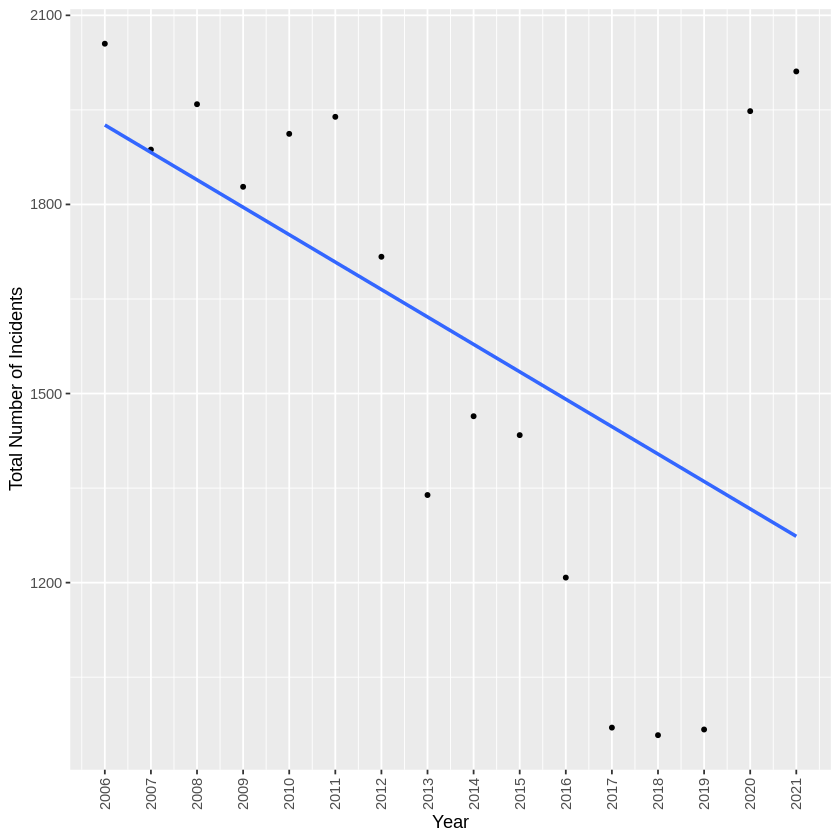

In [13]:
ggplot(incident_count_by_year, aes(x=year, y=ct)) +
    geom_point(size=1) + 
    geom_smooth(method = "lm", se = FALSE) +
    scale_x_continuous(breaks = seq(min(df$year), max(df$year), by = 1)) +
    xlab("Year") + 
    ylab("Total Number of Incidents") +
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) 

In [14]:
incidentcountbyyear.lm <- lm(ct ~ year, data = incident_count_by_year)
summary(incidentcountbyyear.lm)


Call:
lm(formula = ct ~ year, data = incident_count_by_year)

Residuals:
    Min      1Q  Median      3Q     Max 
-477.49 -282.62   18.48  136.73  737.52 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 89192.92   39375.83   2.265   0.0399 *
year          -43.50      19.56  -2.225   0.0431 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 360.6 on 14 degrees of freedom
Multiple R-squared:  0.2612,	Adjusted R-squared:  0.2084 
F-statistic: 4.949 on 1 and 14 DF,  p-value: 0.04307


### Predicting Future Shooting Incident Numbers

In [15]:
89192.92 - (2030*43.50)

[1] 887.92

# Conclusions

In short, we have determined using a linear regression model that there is a down trend in the number of shootings per year in NY. While there is an anomly in the data, it can be explained with its correlation with the COVID-19 outbreak. By 2030, the number of shooting incidents in NY should approximately be lower than 900. 